
# Лабораторная 2 - Обучение сверточной сети на CIFAR10
**NB**: отредактированная версия [этой лабораторной](https://github.com/karfly/learning-deep-learning/blob/master/03_cnn/seminar_cifar10.ipynb)

В данном задании нужно обучить две версии нейронной сети
1. Модель написаную с нуля
2. дообучить готовую модель

<img src="https://pytorch.org/tutorials/_images/cifar10.png" align="center"/>

**CIFAR10** - датасет изображений 32x32 с 10ью классами. Главное отличие в том, что изображения цветные. В нем хрянятся следующие классы:  `airplane`, `automobile`, `bird`, `cat`, `deer`.
`dog`, `frog`, `horse`, `ship`, `truck`.

## Задача 1 (2 балла). Обучение модели с нуля

### 1. Загрузка CIFAR10
Добавим библиотеки

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

batch_size = 4
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Определим CIFAR10 классы:

In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Определим порядок предобработки. На выходе датасет выдает PILImage в диапазоне [0, 1]. Мы его превратим в  torch.Tensor. Затем, сделаем нормализацию (Whitening). 

Вопрос: **Зачем нормализуют изображения?** [1](https://stackoverflow.com/questions/58151507/why-pytorch-officially-use-mean-0-485-0-456-0-406-and-std-0-229-0-224-0-2)

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    # средние значения пикселенй и их отклонений для датасета по цветам
    # если предобучение сети происходило на стандартизованных данных
    # то и при подаче в нее тоже нужно стандартизовать
])

Создадим dataset и dataLoader:

**Вопрос: В чем их отличия?**

In [5]:
train_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

print("len(train_dataset) =", len(train_dataset))

val_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
val_dataloader= torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print("len(val_dataset) =", len(val_dataset))


# dataloader разделяет выборку на несколько потоков и обучает на отдельных GPU - d ytuj ghb[jlbn erfpfntkm yf gfvznm hfpvthjv 32x32
# "dataset открывает картинки, смотри, лоадер - просто упаковывает" - jnrhsdfnm gj jlyjq rfhnbytrt b ghjujyznm xthtp nhfycajhvs

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
len(train_dataset) = 50000
Files already downloaded and verified
len(val_dataset) = 10000


Let us show some of the training images, for fun:

images.shape = torch.Size([4, 3, 32, 32])
labels = tensor([3, 0, 2, 2])
labels.shape = torch.Size([4])


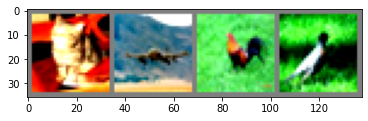

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    img = img.cpu().numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()


# get some random training images
images, labels = next(iter(train_dataloader))

print("images.shape =", images.shape)

print("labels =", labels)
print("labels.shape =", labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

### Создание нейронной сети

Создадим сверточную сеть.Создайте ее со следующей архитектурой:

1. Conv2d (3 -> 6, 5x5, stride=1, padding=FIXME)
2. ReLU
3. MaxPool2d (2x2, stride=2)
4. Conv2d (6 -> 16, 5x5, stride=1, padding=FIXME)
5. ReLU
6. Linear (`FIXME` -> 128)
7. ReLU
8. Linear (128 -> 64)
9. ReLU
10. Linear (64 -> 10)

padding в сверточных слоях нужно будет определить Вам самостоятельно. Также и в первом полносвязном слое.

CONV2D

in_channels (int) – Number of channels in the input image

out_channels (int) – Number of channels produced by the convolution

kernel_size (int or tuple) – Size of the convolving kernel

stride (int or tuple, optional) – Stride of the convolution. Default: 1

padding (int, tuple or str, optional) – Padding added to all four sides of the input. Default: 0

padding_mode (str, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'

dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1

groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1

bias (bool, optional) – If True, adds a learnable bias to the output. Default: True

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch
torch.__version__
import torch.optim
import numpy as np
from PIL import Image
import urllib

import numpy as np # библиотека работы с матрицами на цпу
import time 
import torch.nn # модуль библиотеки для создрания слоев 
import matplotlib.pyplot as plt # библиотека для отображения графиков и изображений
%matplotlib inline


class SimpleConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.convolution2dLayer_1 = nn.Conv2d (in_channels = 3, out_channels = 6 , kernel_size = 5, stride=1, padding=2)
        self.convolution2dLayer_2 = nn.Conv2d (in_channels = 6, out_channels = 16, kernel_size = 5, stride=1, padding=2)


        #этот слой полносвязный
        self.activation = nn.ReLU() #функция активации

        #этот слой полносвязный
        self.pool = nn.MaxPool2d (kernel_size = 2, stride=2) # сокращает колво пикселей

        #first_layer_size = out_channels*16*16
        first_layer_size =           16*32*32
        #first_layer_size =            16*16*16

        self.fc1 = nn.Linear(first_layer_size,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        ## FIXME
        
    def forward(self, x):
        
        ## FIXME
        x = self.convolution2dLayer_1 (x)
        x = self.activation(x)
        x = self.pool(x)
        x = self.convolution2dLayer_2 (x)
        x = self.activation(x)

        print (x.shape)

        x = x.view(-1, 16*32*32) ## что оно делает? без этого не работает (размерность слетает)
        # обычный массив - массив массивов массивов
        # решейп переделает разорванный массив в одну строку с байтами подряд
        # вью говоритт - считать что это массив от а до б
        # вью можо заменить на решейп, если он не работает

        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        

        
        return x


model = SimpleConvNet().to(device)
#model(torch.randn(1,3,16,16))

torch.Size([1, 16, 8, 8])


RuntimeError: ignored

### 3. Зададим функцию потери и оптимизатор


In [26]:
import torch.optim as optim

criterion_loss_func = nn.CrossEntropyLoss().to(device)
opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### 4. Обучение нейронной сети

Теперь нужно написать весь пайплайн обучения. Поправьте и добавьте необходимые строки в ячейку ниже

In [27]:
from tqdm import tqdm_notebook as tqdm

for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0


    for batch in tqdm(train_dataloader):
        # получим данные
        image_batch, label_batch = batch
        image_batch, label_batch = image_batch.to(device), label_batch.to(device)
        
        
        
        
        # обнуление параметров градиента
        opt.zero_grad()

        # forward + backward + optimize
        y_pred = model(image_batch)
        outputs = y_pred

        loss = criterion_loss_func(y_pred, label_batch)
        
        loss.backward()
        opt.step()
        
        running_loss += loss.item()
        
        
    print("[epoch {}] loss: {:.3}".format(epoch, running_loss / len(train_dataloader)))

<ipython-input-27-cd17d9f83626>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_dataloader):


  0%|          | 0/12500 [00:00<?, ?it/s]

[epoch 0] loss: 1.58


  0%|          | 0/12500 [00:00<?, ?it/s]

[epoch 1] loss: 1.22


### 5. Проверка модели на валидационной выборке

После обучения в течение двух эпох давайте проверим научилась ли она обобщать. Мы проверим метки на выходе с истинными значениями. 

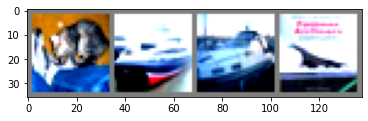

GroundTruth:    cat  ship  ship plane


In [28]:
image_batch, label_batch = next(iter(val_dataloader))
image_batch, label_batch = image_batch.to(device), label_batch.to(device)

# print images
imshow(torchvision.utils.make_grid(image_batch))
print('GroundTruth: ', ' '.join('%5s' % classes[label_batch[j]] for j in range(batch_size)))

Теперь давайте посмотрим что считает наша модель:



In [29]:
outputs = model(image_batch)

На выходе мы получаем энергии по 10 классам.

Чем выше энергия для класса, тем больше модель считает что изображение принадлежит этому классу.

Давайте проверим:

In [32]:
predicted = torch.argmax(outputs, dim=1)



In [35]:
{" ".join(classes[predicted[j]]for j in range(batch_size))}

{'cat ship ship ship'}

А теперь давайте проверим по всему валидационному датасету:

In [36]:
model.eval()

correct = 0
total = 0
with torch.no_grad():
    for batch in tqdm(val_dataloader):
        image_batch, label_batch = batch
        image_batch, label_batch = image_batch.to(device), label_batch.to(device)
        
        outputs = model (image_batch)
        predicted = torch.argmax(outputs, dim =1)
        
        total += labels.size(0)
        correct += (predicted == label_batch).sum().item()

print(f"Точность модели на 10000 изображений: {100 * correct / total:.4f}")

<ipython-input-36-f8182220746d>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(val_dataloader):


  0%|          | 0/2500 [00:00<?, ?it/s]

Точность модели на 10000 изображений: 59.1200


## Задача 2 (2 балла). обучение предобученной модели (Finetuning)

**Глубокое обучение** связано с иерархическим изучением признаков. Это означает, что бОльшая часть нейронной сети только учится извлекать признаки, и только последние слои учатся классифицировать целевую задачу. Итак, если мы возьмем какую-нибудь современную модель, тщательно обученную на большом наборе данных, вполне вероятно, что она научилась извлекать из данных некоторые полезные функции. Это позволит сократить время обучения на новой задаче.

В этой части семинара мы обучим [AlexNet](https://arxiv.org/abs/1404.5997) (одна из первых глубоких архитектур CNN), обученную на ImageNet (набор данных изображений класса 1000).

Согласно [документации](https://pytorch.org/vision/main/models/generated/torchvision.models.alexnet.html#torchvision.models.AlexNet_Weights), модели нужно  подавать на вход изображения с разрешением 224x224. Добавьте необходимые [трансформы](https://pytorch.org/vision/main/transforms.html#transforms-on-pil-image-and-torch-tensor):

In [38]:
transform = transforms.Compose([
    transforms.Resize(size = 224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

Создадим dataset и dataLoader:

In [39]:
train_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

print("len(train_dataset) =", len(train_dataset))

val_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
val_dataloader= torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print("len(val_dataset) =", len(val_dataset))

Files already downloaded and verified
len(train_dataset) = 50000
Files already downloaded and verified
len(val_dataset) = 10000


### 1. Загрузка предобученной модели

Теперь загрузим уже предобученную модель AlexNet. `torchvision` дает нам простой интерфейс для загрузки популярных предварительно обученных моделей (загрузка весов может занять некоторое время):

In [40]:
model = torchvision.models.alexnet(pretrained=True).to(device)
print(model)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Как можно увидеть, есть два главных модуля:
 - **features**: извлекает признаки из изображений
 - **classifier**: выполняет классификацию по 1000 классам
 
модуль `features` нам пригодится. А модуль `classifier` настроен для классификации по ImageNet. Его мы и заменим

Нам не нужно обучать модуль `features`, поэтому для каждого параметра слоев [нужно](https://stackoverflow.com/questions/62523912/how-to-freeze-selected-layers-of-a-model-in-pytorch) выставить `requiers_grad=False`:

In [ ]:
## пройти в цикле по каждому параметру в features и заморозить их
for param in model.parameters():
    param.requiers_grad=False

Теперь соберем новый классификатор. Используйте [nn.Sequential](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential) для упрощения читабельности кода. Также попробуйте [nn.Dropout](https://pytorch.org/docs/stable/nn.html#torch.nn.Dropout):

Conv2d (3 -> 6, 5x5, stride=1, padding=FIXME)
ReLU
MaxPool2d (2x2, stride=2)
Conv2d (6 -> 16, 5x5, stride=1, padding=FIXME)
ReLU
Linear (FIXME -> 128)
ReLU
Linear (128 -> 64)
ReLU
Linear (64 -> 10)

In [47]:
classifier = nn.Sequential(
          nn.Dropout(0.1),
          nn.Conv2d (in_channels = 256, out_channels = 6 , kernel_size = 5, stride=1, padding=0),
          nn.ReLU(),
          nn.MaxPool2d (kernel_size = 2, stride=2),
          nn.Conv2d (in_channels = 6, out_channels = 16, kernel_size = 5, stride=1, padding=0),
          nn.ReLU(),

          nn.Linear(4916,128),
          nn.ReLU(),
          nn.Linear(128,64),
          nn.ReLU(),
          nn.Linear(64,10),
          nn.ReLU()
        )

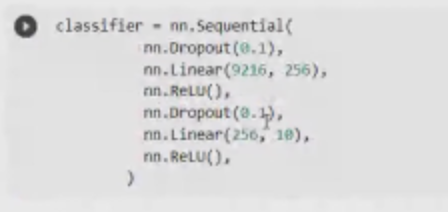

In [51]:
classifier = nn.Sequential(
          nn.Dropout(0.1),
          nn.Linear(9216,128),
          nn.ReLU(),
          nn.Dropout(0.1),
          nn.Linear(128,10),
          nn.ReLU(),
        )

Заменим классификатор на наш:

In [52]:
model.classifier = classifier

Зададим функцию потери и оптимизатор


In [53]:
criterion = nn.CrossEntropyLoss().to(device)
opt = optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9)

Обучите в течение одной эпохи:

In [54]:
num_epoch = 1


for epoch in range(num_epoch):

    #Переводит модель в режим обучения
    model.train()
    for batch in tqdm(train_dataloader):
        # получим данные
        image_batch, label_batch = batch
        image_batch, label_batch = image_batch.to(device), label_batch.to(device)
        
        
        
        
        

        # forward + backward + optimize
        y_pred = model(image_batch)
        outputs = y_pred

        loss = criterion_loss_func(y_pred, label_batch)
        # обнуление параметров градиента
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        running_loss += loss.item()
        
        
    print("[epoch {}] loss: {:.3}".format(epoch, running_loss / len(train_dataloader)))

<ipython-input-54-c0db2d618831>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_dataloader):


  0%|          | 0/12500 [00:00<?, ?it/s]

[epoch 0] loss: 2.03


Проверьте на валидационной выборке:

In [55]:
model.eval()

correct = 0
total = 0
with torch.no_grad():
    for batch in tqdm(val_dataloader):
        image_batch, label_batch = batch
        image_batch, label_batch = image_batch.to(device), label_batch.to(device)
        
        outputs = model (image_batch)
        predicted = torch.argmax(outputs, dim =1)
        
        total += labels.size(0)
        correct += (predicted == label_batch).sum().item()

print(f"Точность модели на 10000 изображений: {100 * correct / total:.4f}")

<ipython-input-55-f8182220746d>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(val_dataloader):


  0%|          | 0/2500 [00:00<?, ?it/s]

Точность модели на 10000 изображений: 76.6800


WOW! We seriously improved accuracy of our model by just finetuning several linear layers. Here is the power of finetuning!
Теперь Вы можете видеть, в чем польза transfer learning!

In [58]:
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=9216, out_features=128, bias=True)
  

проверяю, можно ли вообще не обучая модель ... наверное нет, потому то в ней нет классов тех6 что у нас? а может и есть 

In [57]:
model_orig = torchvision.models.alexnet(pretrained=True).to(device)
print(model_orig)



AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [59]:
model_orig.eval()

correct = 0
total = 0
with torch.no_grad():
    for batch in tqdm(val_dataloader):
        image_batch, label_batch = batch
        image_batch, label_batch = image_batch.to(device), label_batch.to(device)
        
        outputs = model_orig (image_batch)
        predicted = torch.argmax(outputs, dim =1)
        
        total += labels.size(0)
        correct += (predicted == label_batch).sum().item()

print(f"Точность модели на 10000 изображений: {100 * correct / total:.4f}")

<ipython-input-59-369b9f8d8f67>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(val_dataloader):


  0%|          | 0/2500 [00:00<?, ?it/s]

Точность модели на 10000 изображений: 0.0100
